# **Materials and methods: steps**

### **1. Selection of the protein data set from PDB**
### **2. PDBe Fold Multiple structural alignment**
### **3. Generation of the Hidden Markov Model for modeling BPTI/Kunitz domain**
### **4. Selection of the testing sets from UniProt**
### **5.Testing the model with hmm search**
### **6. Method optimization and assessment**





------------------------------------------------------------------------
### this file contains all the codes and commands for every step of the material and method part in the main report

### **1. Selection of the protein data set from PDB**


### 1.1 checking the downloaded report saved as csv file rcsb_pdb_custom_report.csv 

In [1]:
%%bash
less rcsb_pdb_custom_report.csv
less rcsb_pdb_custom_report.csv| wc

Identifier,StructureData,Polymer EntityData,
Entity ID,PDB ID,Auth Asym ID,
"1AAP_1","1AAP","A"
,,"B"
"1BRB_2","1BRB","I"
"1BUN_2","1BUN","B"
"1DTX_1","1DTX","A"
"1F7Z_2","1F7Z","I"
"1FAK_4","1FAK","I"
"1G6X_1","1G6X","A"
"1KTH_1","1KTH","A"
"1TFX_2","1TFX","C"
,,"D"
"1YC0_2","1YC0","I"
"1YLD_2","1YLD","B"
"1ZR0_2","1ZR0","B"
,,"D"
"2ZJX_1","2ZJX","A"
,,"B"
"3BYB_1","3BYB","A"
,,"B"
,,"C"
"3M7Q_2","3M7Q","B"
"3WNY_1","3WNY","A"
,,"C"
,,"E"
,,"G"
,,"B"
,,"F"
,,"H"
,,"I"
"4BQD_1","4BQD","A"
,,"B"
"4DTG_3","4DTG","K"
"4ISO_2","4ISO","B"
"4NTW_2","4NTW","B"
"4U30_2","4U30","X"
,,"Y"
,,"Z"
,,"W"
"4U32_1","4U32","X"
"5JB5_1","5JB5","A"
,,"B"
,,"C"
"5M4V_1","5M4V","A"
"5NX1_3","5NX1","D"
"5NX3_3","5NX3","D"
"5PTI_1","5PTI","A"
"5YV7_1","5YV7","A"
"5YW1_3","5YW1","I"
"6BX8_2","6BX8","D"
,,"F"
,,"H"
,,"B"
"6HAR_2","6HAR","E"
"6Q61_1","6Q61","A"
"6YHY_1","6YHY","A"
,,"B"
     58      63     874


### 1.2 cleaning the csv file rcsb_pdb_custom_report.csv

In [ ]:
%%bash
# rcsb_pdb_custom_report.csv was cleaned with the following full linux terminal command:
tail -n +3 rcsb_pdb_custom_report.csv |grep -v "^,," |cut -d "," -f 2,3 |tr -d \"|tr "," ":">pdbe_list.txt

In [ ]:
%%bash
#the previous command in detail step by step:
#This first step command takes the contents of the file rcsb_pdb_custom_report.csv, and displays it starting from the 3rd line using tail command. The +3 flag tells tail to start from line 3.
tail -n +3 rcsb_pdb_custom_report.csv

"1AAP_1","1AAP","A"
,,"B"
"1BRB_2","1BRB","I"
"1BUN_2","1BUN","B"
"1DTX_1","1DTX","A"
"1F7Z_2","1F7Z","I"
"1FAK_4","1FAK","I"
"1G6X_1","1G6X","A"
"1KTH_1","1KTH","A"
"1TFX_2","1TFX","C"
,,"D"
"1YC0_2","1YC0","I"
"1YLD_2","1YLD","B"
"1ZR0_2","1ZR0","B"
,,"D"
"2ZJX_1","2ZJX","A"
,,"B"
"3BYB_1","3BYB","A"
,,"B"
,,"C"
"3M7Q_2","3M7Q","B"
"3WNY_1","3WNY","A"
,,"C"
,,"E"
,,"G"
,,"B"
,,"F"
,,"H"
,,"I"
"4BQD_1","4BQD","A"
,,"B"
"4DTG_3","4DTG","K"
"4ISO_2","4ISO","B"
"4NTW_2","4NTW","B"
"4U30_2","4U30","X"
,,"Y"
,,"Z"
,,"W"
"4U32_1","4U32","X"
"5JB5_1","5JB5","A"
,,"B"
,,"C"
"5M4V_1","5M4V","A"
"5NX1_3","5NX1","D"
"5NX3_3","5NX3","D"
"5PTI_1","5PTI","A"
"5YV7_1","5YV7","A"
"5YW1_3","5YW1","I"
"6BX8_2","6BX8","D"
,,"F"
,,"H"
,,"B"
"6HAR_2","6HAR","E"
"6Q61_1","6Q61","A"
"6YHY_1","6YHY","A"
,,"B"


In [ ]:
%%bash
#The pipe symbol | takes the output of the previous command and passes it as input to the next command. In this case, the output of the tail command is passed to grep command. grep is a command-line utility for searching text. The -v option tells grep to exclude any lines that match the pattern that follows. In this case, the pattern is ^,, which means any line that starts with two commas.
tail -n +3 rcsb_pdb_custom_report.csv|grep -v "^,,"


"1AAP_1","1AAP","A"
"1BRB_2","1BRB","I"
"1BUN_2","1BUN","B"
"1DTX_1","1DTX","A"
"1F7Z_2","1F7Z","I"
"1FAK_4","1FAK","I"
"1G6X_1","1G6X","A"
"1KTH_1","1KTH","A"
"1TFX_2","1TFX","C"
"1YC0_2","1YC0","I"
"1YLD_2","1YLD","B"
"1ZR0_2","1ZR0","B"
"2ZJX_1","2ZJX","A"
"3BYB_1","3BYB","A"
"3M7Q_2","3M7Q","B"
"3WNY_1","3WNY","A"
"4BQD_1","4BQD","A"
"4DTG_3","4DTG","K"
"4ISO_2","4ISO","B"
"4NTW_2","4NTW","B"
"4U30_2","4U30","X"
"4U32_1","4U32","X"
"5JB5_1","5JB5","A"
"5M4V_1","5M4V","A"
"5NX1_3","5NX1","D"
"5NX3_3","5NX3","D"
"5PTI_1","5PTI","A"
"5YV7_1","5YV7","A"
"5YW1_3","5YW1","I"
"6BX8_2","6BX8","D"
"6HAR_2","6HAR","E"
"6Q61_1","6Q61","A"
"6YHY_1","6YHY","A"


In [ ]:
%%bash
#The command cut is used to select specific fields from the input. In this case, the -d option specifies the delimiter used in the file, which is a comma ,, and the -f option selects the second and third fields. This command extracts the contents of the second and third columns from the CSV file.
tail -n +3 rcsb_pdb_custom_report.csv |grep -v "^,," |cut -d "," -f 2,3 

"1AAP","A"
"1BRB","I"
"1BUN","B"
"1DTX","A"
"1F7Z","I"
"1FAK","I"
"1G6X","A"
"1KTH","A"
"1TFX","C"
"1YC0","I"
"1YLD","B"
"1ZR0","B"
"2ZJX","A"
"3BYB","A"
"3M7Q","B"
"3WNY","A"
"4BQD","A"
"4DTG","K"
"4ISO","B"
"4NTW","B"
"4U30","X"
"4U32","X"
"5JB5","A"
"5M4V","A"
"5NX1","D"
"5NX3","D"
"5PTI","A"
"5YV7","A"
"5YW1","I"
"6BX8","D"
"6HAR","E"
"6Q61","A"
"6YHY","A"


In [ ]:
%%bash
#The last two tr commands are used to replace specific characters. tr stands for "translate" and is a command that replaces characters in a string. The first tr command removes any occurrences of the backslash character \. The second tr command replaces any commas , with colons :
tail -n +3 rcsb_pdb_custom_report.csv |grep -v "^,," |cut -d "," -f 2,3 |tr -d \"|tr "," ":"


1AAP:A
1BRB:I
1BUN:B
1DTX:A
1F7Z:I
1FAK:I
1G6X:A
1KTH:A
1TFX:C
1YC0:I
1YLD:B
1ZR0:B
2ZJX:A
3BYB:A
3M7Q:B
3WNY:A
4BQD:A
4DTG:K
4ISO:B
4NTW:B
4U30:X
4U32:X
5JB5:A
5M4V:A
5NX1:D
5NX3:D
5PTI:A
5YV7:A
5YW1:I
6BX8:D
6HAR:E
6Q61:A
6YHY:A


In [ ]:
%%bash
#Finally, the output of this command is redirected using > to a file called pdbe_list.txt
tail -n +3 rcsb_pdb_custom_report.csv |grep -v "^,," |cut -d "," -f 2,3 |tr -d \"|tr "," ":">pdbe_list.txt



In [ ]:
%%bash
less pdbe_list.txt

1AAP:A
1BRB:I
1BUN:B
1DTX:A
1F7Z:I
1FAK:I
1G6X:A
1KTH:A
1TFX:C
1YC0:I
1YLD:B
1ZR0:B
2ZJX:A
3BYB:A
3M7Q:B
3WNY:A
4BQD:A
4DTG:K
4ISO:B
4NTW:B
4U30:X
4U32:X
5JB5:A
5M4V:A
5NX1:D
5NX3:D
5PTI:A
5YV7:A
5YW1:I
6BX8:D
6HAR:E
6Q61:A
6YHY:A


### **2. PDBe Fold Multiple structural alignment**

### 2.1 the file of the resulting MSA was downloaded in FASTA format (aln.fasta.seq)


In [ ]:
%%bash
less aln.fasta.seq

>PDB:1aap:A X-RAY CRYSTAL STRUCTURE OF THE PROTEASE INHIBITOR 
--------------------vrevcseqaetgpcrAMISRWYFDVTEGKCAPFFYGGcGG-NRNNFDTEE
YCMAVCg---

>PDB:1brb:I CRYSTAL STRUCTURES OF RAT ANIONIC TRYPSIN COMPLEXE
------------------------ageppytgpckARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAE
DCMRTA----

>PDB:1bun:B STRUCTURE OF BETA2-BUNGAROTOXIN: POTASSIUM CHANNEL
------------------rkrhpdcdkppdtkicqTVVRAFYYKPSAKRCVQFRYGG-CNgNGNHFKSDH
LCRCECleyr

>PDB:1dtx:A CRYSTAL STRUCTURE OF ALPHA-DENDROTOXIN FROM THE GR
------------------eprrklcilhrnpgrcyDKIPAFYYNQKKKQCERFDWSGcGG-NSNRFKTIE
ECRRTCig--

>PDB:1f7z:I RAT TRYPSINOGEN K15A COMPLEXED WITH BOVINE PANCREA
--------------------rpdfcleppytgpckARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAE
DCMRTCg---

>PDB:1fak:I HUMAN TISSUE FACTOR COMPLEXED WITH COAGULATION FAC
--------------------apdfcleppydgpcrALHLRYFYNAKAGLCQTFYYGGcLA-KRNNFESAE
DCMRTC----

>PDB:1g6x:A ULTRA HIGH RESOLUTION STRUCTURE OF BOVINE PANCREAT
--------------------rpdfcleppyagacrARIIRYFYNAKAGLCQTFVYGGcRA-

### 2.2 cleaning the aln.fasta.seq file

In [ ]:
%%bash
#To delete empty strings from the file 
grep . aln.fasta.seq

>PDB:1aap:A X-RAY CRYSTAL STRUCTURE OF THE PROTEASE INHIBITOR 
--------------------vrevcseqaetgpcrAMISRWYFDVTEGKCAPFFYGGcGG-NRNNFDTEE
YCMAVCg---
>PDB:1brb:I CRYSTAL STRUCTURES OF RAT ANIONIC TRYPSIN COMPLEXE
------------------------ageppytgpckARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAE
DCMRTA----
>PDB:1bun:B STRUCTURE OF BETA2-BUNGAROTOXIN: POTASSIUM CHANNEL
------------------rkrhpdcdkppdtkicqTVVRAFYYKPSAKRCVQFRYGG-CNgNGNHFKSDH
LCRCECleyr
>PDB:1dtx:A CRYSTAL STRUCTURE OF ALPHA-DENDROTOXIN FROM THE GR
------------------eprrklcilhrnpgrcyDKIPAFYYNQKKKQCERFDWSGcGG-NSNRFKTIE
ECRRTCig--
>PDB:1f7z:I RAT TRYPSINOGEN K15A COMPLEXED WITH BOVINE PANCREA
--------------------rpdfcleppytgpckARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAE
DCMRTCg---
>PDB:1fak:I HUMAN TISSUE FACTOR COMPLEXED WITH COAGULATION FAC
--------------------apdfcleppydgpcrALHLRYFYNAKAGLCQTFYYGGcLA-KRNNFESAE
DCMRTC----
>PDB:1g6x:A ULTRA HIGH RESOLUTION STRUCTURE OF BOVINE PANCREAT
--------------------rpdfcleppyagacrARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFK

In [ ]:
%%bash
#to put everything in one line, to visualize better the alignment
grep . aln.fasta.seq  |awk '{if  (substr($1,1,1)==">") {printf "\n%s ",$1} else {printf"%s",$0}}' 


>PDB:1aap:A --------------------vrevcseqaetgpcrAMISRWYFDVTEGKCAPFFYGGcGG-NRNNFDTEEYCMAVCg---
>PDB:1brb:I ------------------------ageppytgpckARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAEDCMRTA----
>PDB:1bun:B ------------------rkrhpdcdkppdtkicqTVVRAFYYKPSAKRCVQFRYGG-CNgNGNHFKSDHLCRCECleyr
>PDB:1dtx:A ------------------eprrklcilhrnpgrcyDKIPAFYYNQKKKQCERFDWSGcGG-NSNRFKTIEECRRTCig--
>PDB:1f7z:I --------------------rpdfcleppytgpckARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAEDCMRTCg---
>PDB:1fak:I --------------------apdfcleppydgpcrALHLRYFYNAKAGLCQTFYYGGcLA-KRNNFESAEDCMRTC----
>PDB:1g6x:A --------------------rpdfcleppyagacrARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAEDCLRTCgga-
>PDB:1kth:A --------------------etdicklpkdegtcrDFILKWYYDPNTKSCARFWYGGcGG-NENKFGSQKECEKVCapv-
>PDB:1tfx:C --------------------kpdfcfleedpgicrGYITRYFYNNQTKQCERFKYGGcLG-NMNNFETLEECKNICedg-
>PDB:1yc0:I ------------qhqhqmhqtedyclasnkvgrcrGSFPRWYYDPTEQICKSFVYGGcLG-NKNNYLREEECILACrgv-
>PDB:1yld:B --------------------rpdfxleppytgpckARIIRYFYNAPDGLXQTFVYGG

In [ ]:
%%bash
#to remove the first 20 ‘-’:  
grep . aln.fasta.seq |awk '{if (substr($1,1,1)==">") {printf "\n%s ",$1} else {printf "%s",$0}}' |awk '{print $1;print substr($2,20,58)}' |less



>PDB:1aap:A
-vrevcseqaetgpcrAMISRWYFDVTEGKCAPFFYGGcGG-NRNNFDTEEYCMAVCg
>PDB:1brb:I
-----ageppytgpckARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAEDCMRTA-
>PDB:1bun:B
krhpdcdkppdtkicqTVVRAFYYKPSAKRCVQFRYGG-CNgNGNHFKSDHLCRCECl
>PDB:1dtx:A
prrklcilhrnpgrcyDKIPAFYYNQKKKQCERFDWSGcGG-NSNRFKTIEECRRTCi
>PDB:1f7z:I
-rpdfcleppytgpckARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAEDCMRTCg
>PDB:1fak:I
-apdfcleppydgpcrALHLRYFYNAKAGLCQTFYYGGcLA-KRNNFESAEDCMRTC-
>PDB:1g6x:A
-rpdfcleppyagacrARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAEDCLRTCg
>PDB:1kth:A
-etdicklpkdegtcrDFILKWYYDPNTKSCARFWYGGcGG-NENKFGSQKECEKVCa
>PDB:1tfx:C
-kpdfcfleedpgicrGYITRYFYNNQTKQCERFKYGGcLG-NMNNFETLEECKNICe
>PDB:1yc0:I
qtedyclasnkvgrcrGSFPRWYYDPTEQICKSFVYGGcLG-NKNNYLREEECILACr
>PDB:1yld:B
-rpdfxleppytgpckARIIRYFYNAPDGLXQTFVYGGcRA-KRNNFKSAEDXMRTXg
>PDB:1zr0:B
nnaeicllpldygpcrALLLRYYYDRYTQSCRQFLYGGcEG-NANNFYTWEACDDACw
>PDB:2zjx:A
-rpdfcleppytgpgkARIIRYFYNAKAGLAQTFVYGGaRA-KRNNFKSAEDALRTCg
>PDB:3byb:A
drpdfcelpadtgpcrVRFPSFYYNPDEKKCLEFIYGGcEG-NANNFITKEECESTCa
>PDB

In [2]:
%%bash
#saving the file as ali_3d_clean.fasta:
grep . aln.fasta.seq  | awk '{if (substr($1,1,1)==">") {printf "\n%s ", $1} else {printf "%s",$0}}' | awk '{print $1; print toupper(substr($2,20,58))}' |tail -n +3 >ali_3d_clean.fasta

In [ ]:
%%bash
less ali_3d_clean.fasta

>PDB:1aap:A
-VREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGG-NRNNFDTEEYCMAVCG
>PDB:1brb:I
-----AGEPPYTGPCKARIIRYFYNAKAGLCQTFVYGGCRA-KRNNFKSAEDCMRTA-
>PDB:1bun:B
KRHPDCDKPPDTKICQTVVRAFYYKPSAKRCVQFRYGG-CNGNGNHFKSDHLCRCECL
>PDB:1dtx:A
PRRKLCILHRNPGRCYDKIPAFYYNQKKKQCERFDWSGCGG-NSNRFKTIEECRRTCI
>PDB:1f7z:I
-RPDFCLEPPYTGPCKARIIRYFYNAKAGLCQTFVYGGCRA-KRNNFKSAEDCMRTCG
>PDB:1fak:I
-APDFCLEPPYDGPCRALHLRYFYNAKAGLCQTFYYGGCLA-KRNNFESAEDCMRTC-
>PDB:1g6x:A
-RPDFCLEPPYAGACRARIIRYFYNAKAGLCQTFVYGGCRA-KRNNFKSAEDCLRTCG
>PDB:1kth:A
-ETDICKLPKDEGTCRDFILKWYYDPNTKSCARFWYGGCGG-NENKFGSQKECEKVCA
>PDB:1tfx:C
-KPDFCFLEEDPGICRGYITRYFYNNQTKQCERFKYGGCLG-NMNNFETLEECKNICE
>PDB:1yc0:I
QTEDYCLASNKVGRCRGSFPRWYYDPTEQICKSFVYGGCLG-NKNNYLREEECILACR
>PDB:1yld:B
-RPDFXLEPPYTGPCKARIIRYFYNAPDGLXQTFVYGGCRA-KRNNFKSAEDXMRTXG
>PDB:1zr0:B
NNAEICLLPLDYGPCRALLLRYYYDRYTQSCRQFLYGGCEG-NANNFYTWEACDDACW
>PDB:2zjx:A
-RPDFCLEPPYTGPGKARIIRYFYNAKAGLAQTFVYGGARA-KRNNFKSAEDALRTCG
>PDB:3byb:A
DRPDFCELPADTGPCRVRFPSFYYNPDEKKCLEFIYGGCEG-NANNFITKEECESTCA
>PDB:3

### **3. Generation of the Hidden Markov Model for modeling BPTI/Kunitz domain**

In [ ]:
!apt-get install hmmer



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libdivsufsort3
Suggested packages:
  hmmer-doc
The following NEW packages will be installed:
  hmmer libdivsufsort3
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,196 kB of archives.
After this operation, 7,646 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libdivsufsort3 amd64 2.0.1-4 [42.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 hmmer amd64 3.3+dfsg2-1 [1,154 kB]
Fetched 1,196 kB in 1s (868 kB/s)
Selecting previously unselected package libdivsufsort3:amd64.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../libdivsufsort3_2.0.1-4_amd64.deb ...
Unpacking libdivsufsort3:amd64 (2.0.1-4) ...
Selecting previously unselected package hmmer.
Preparing to unpack .../hmmer_3.3+dfsg2-1_amd64.d

In [ ]:
%%bash
#To obtain the HMM model from the cleaned version of the alignment file:
hmmbuild ali_3d_clean.hmm ali_3d_clean.fasta 



# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3 (Nov 2019); http://hmmer.org/
# Copyright (C) 2019 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             ali_3d_clean.fasta
# output HMM file:                  ali_3d_clean.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     ali_3d_clean            33    58    57     2.99  0.977 

# CPU time: 0.02u 0.00s 00:00:00.02 Elapsed: 00:00:00.02


In [ ]:
%%bash
less ali_3d_clean.hmm

HMMER3/f [3.3 | Nov 2019]
NAME  ali_3d_clean
LENG  57
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Wed May 10 12:45:46 2023
NSEQ  33
EFFN  2.993042
CKSUM 1527410331
STATS LOCAL MSV       -8.9168  0.71899
STATS LOCAL VITERBI   -9.1388  0.71899
STATS LOCAL FORWARD   -4.1186  0.71899
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.60807  2.77943  3.08986  2.68298  2.74202  2.67558  3.86336  3.43126  2.60564  3.06924  4.08306  2.69167  3.45329  3.07193  2.80868  2.80201  2.94153  3.22703  4.61325  2.85649
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.49719  4.92513  0.95581  0.61958  0.77255  0.000

### **4. Selection of the testing sets from UniProt**


### 4.1 positive dataset from Uniprot for testing the hmm model

In [85]:
%%bash 
less uniprot_positive.list| wc

    384     384    2712


### 4.2 negative dataset for testing the hmm model

In [ ]:
%%bash
grep ">" negative1.fasta| wc

 569126 8299299 73571394


### 4.3 cleaning of positive dataset from uniprot

In [ ]:
#first of all the file pdbe_list.txt was cleaned to obtain only the pdb ids without the chains
%%bash
cut -b 1-4 pdbe_list.txt >ids_pdb.txt
less ids_pdb.txt

1AAP
1BRB
1BUN
1DTX
1F7Z
1FAK
1G6X
1KTH
1TFX
1YC0
1YLD
1ZR0
2ZJX
3BYB
3M7Q
3WNY
4BQD
4DTG
4ISO
4NTW
4U30
4U32
5JB5
5M4V
5NX1
5NX3
5PTI
5YV7
5YW1
6BX8
6HAR
6Q61
6YHY


In [ ]:
%%bash
#extract from the pdb list of ids (ids_pdb.txt) the corresponding uniprot ids with ids mapping on uniprot to obtain a list file called to_remove.list
less to_remove.list

P05067
P00763
P00974
P00617
P00989
P00980
P00763
P00974
P08709
P13726
P00974
P00974
P12111
P10646
P00761
O43278
Q04756
P00763
P00974
P48307
P00760
P00974
Q90WA1
P31713
P00760
P00974
P10646
P10646
O43278
Q9Y5Y6
G9I929
G9I930
Q1XA76
P02760
P35030
O43291
P35030
P00974
A0A1Z0YU59
Q92876
Q92876
P00974
P81658
P00974
P10646
P35030
P0C1X2
P0C1X2


In [ ]:
%%bash
# Create a python code (uniprot_cleaning.py) to remove these ids (to_remove.list) from the positive data set (uniprot_positive.list) and to create a new cleaned file with the final result
less uniprot_cleaning.py

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
from sys import argv
file1=open(argv[1], "r")
file2=open(argv[2],"r")
file3=open(argv[3], "w")
lst=[]
lst2=[]
for line in file1:
    lst.append(line)
for line2 in file2:
    lst2.append(line2)
for i in lst:
    if i not in lst2:
        file3.write(i)



In [6]:
%%bash
python uniprot_cleaning.py uniprot_positive.list to_remove.list file_result.txt
less file_result.txt|wc

    368     368    2596


In [ ]:
%%bash
# alternative: use this command to remove the list of ids (to_remove.list) from the positive dataset without using python codes
comm -23 <(sort uniprot_positive.list) <(sort to_remove.list) > ids_uniprot_not_redundant.txt
less ids_uniprot_not_redundant.txt | wc
# file_result.txt and ids_uniprot_not_redundant.txt have the same number of sequences as expected

    368     368    2596


In [84]:
%%bash
# after the mapping ids with this file ids_uniprot_not_redundant.txt that contains 368 ids in uniprot, get the fasta file (kunitz_clean.fasta) and this should be the positive test.
grep ">" kunitz_clean.fasta| wc


    368    3713   38297


### **5 Testing the model with hmm search**

### 5.1 hmm search with positive set and hmm model for kunitz domain


In [79]:
%%bash
#hmm search takes as input an hmm file and a fasta sequence input.
#the command for matching a set of sequences (kunitz_clean.fasta) with the HMM model (ali_3d_clean.hmm) is the following:
hmmsearch --max --noali -o kunitz.search ali_3d_clean.hmm kunitz_clean.fasta
less kunitz.search

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.3 (Nov 2019); http://hmmer.org/
# Copyright (C) 2019 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  ali_3d_clean.hmm
# target sequence database:        kunitz_clean.fasta
# output directed to file:         kunitz.search
# show alignments in output:       no
# Max sensitivity mode:            on [all heuristic filters off]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       ali_3d_clean  [M=57]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence                  Description
    ------- ------ -----    ------- ------ -----   ---- --  --------                  -----------
   3.2e-197  633.4 185.0    3.

### 5.2 cleaning of the kunitz search file



In [80]:
%%bash
head -n 385 kunitz.search |tail -n +18 > kunitz_clean.out  
#Specifically this command is used to extract a specific portion of the "kunitz.search" file and save it to a new file "kunitz_clean.out". The specific portion to be extracted includes all lines from the 18th line to the 385th line of the original file. And in kunitz_clean.out there are the matches of the positives.


In [81]:
%%bash
less kunitz_clean.out| wc


    368    4643   44896


### 5.3 hmm search with negative set and hmm model for kunitz domain

In [82]:
%%bash
#the same was done with negative test dataset (without kunitz domain) 
hmmsearch --max --noali -o nonkunitz.search ali_3d_clean.hmm negative1.fasta
less nonkunitz.search

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.3 (Nov 2019); http://hmmer.org/
# Copyright (C) 2019 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  ali_3d_clean.hmm
# target sequence database:        negative1.fasta
# output directed to file:         nonkunitz.search
# show alignments in output:       no
# Max sensitivity mode:            on [all heuristic filters off]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       ali_3d_clean  [M=57]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence                  Description
    ------- ------ -----    ------- ------ -----   ---- --  --------                  -----------
     0.0024   22.7   0.1     0

### 5.4 Cleaning of non kunitz search file

In [83]:
%%bash
#nonkunitz_new.search was cleaned:
head -n 51 nonkunitz.search|tail -n +18|grep -v inclusion >nonkunitz_new.out
less nonkunitz_new.out | wc


     33     445    4026


### 5.5 Extracting ids, e-value and adding 0 to non kunitz file

In [ ]:
%%bash
#it is necessary to do this to clean up the file to extract the identifier in the nine column and the e-value in the position 4.
#it can be used awk command and print column 9 and 4 :
awk '{split($9,a,"|"); print a[2],$4,0}' nonkunitz_new.out > non_kunitz_new.class
#Specifically, the command extracts the second part of the 9th column (which is separated by "|"), the 4th column, and the number "0" for each line in the file, and combine them into a single line in the output file.
less non_kunitz_new.class

P84555 0.0025 0
P0DJ63 0.026 0
Q09JW3 0.051 0
P83605 0.038 0
Q09JW4 0.11 0
C5H8E7 0.097 0
P85039 0.12 0
Q8WPG5 0.72 0
P84556 0.88 0
P85040 1.1 0
Q91736 4 0
Q91571 4.1 0
P09759 4.9 0
Q8CBF3 4.9 0
P54762 4.9 0
P0DV02 2 0
Q07494 4.9 0
P0DM47 2.5 0
P83604 3 0
P56409 2.1 0
P36235 5.1 0
P78746 12 0
P71089 8.5 0
P28693 14 0
P0DV07 5.8 0
Q91845 20 0
P29323 20 0
Q91694 20 0
Q90344 14 0
Q07496 20 0
P54763 22 0
P40500 16 0
Q03137 26 0


### 5.6 Extracting ids, e-value and adding 1 to kunitz file

In [ ]:
%%bash
#the same step before was done with the positive file with kunitz matches but 1 was set instead of 0:
awk '{split($9,a,"|"); print a[2],$4,1}' kunitz_clean.out > kunitz.class


### 5.7 adding missing lines to non kunitz class file 

In [ ]:
%%bash
#checking how many sequences in non_kunitz_new.class
less non_kunitz_new.class | wc

     33      99     428


In [ ]:
%%bash
#First of all the identifiers from the negative.fasta file were extracted:
grep ">" negative1.fasta |cut -d "|" -f 2 |sort >nonkunitz1.list
grep ">" negative1.fasta| wc


 569126 8299299 73571394


In [ ]:
%%bash
#taking only the identifiers from nonkunitz.class with this command:
cut -d " " -f 1 non_kunitz_new.class |sort >list_hits_new.txt
less list_hits_new.txt

C5H8E7
P09759
P0DJ63
P0DM47
P0DV02
P0DV07
P28693
P29323
P36235
P40500
P54762
P54763
P56409
P71089
P78746
P83604
P83605
P84555
P84556
P85039
P85040
Q03137
Q07494
Q07496
Q09JW3
Q09JW4
Q8CBF3
Q8WPG5
Q90344
Q91571
Q91694
Q91736
Q91845


In [ ]:
%%bash
#showing the difference between the two files(nonkunitz1.list without the list_hits_new.txt ids):
comm -23 nonkunitz1.list list_hits_new.txt |wc



 569093  569093 4000355


In [ ]:
%%bash
 #assigning e-value as 100 and the 0 to the recovered ids and adding the missing lines to the non kunitz class file
 comm -23 nonkunitz1.list list_hits_new.txt |awk '{print $0,100,0}'  >>non_kunitz_new.class

### **6 Method optimization and assessment**

### 6.1  two-fold-cross-validation

In [ ]:
%%bash
#shuffling non_kunitz_new.class 
sort -R non_kunitz_new.class >non_kunitz.random

In [ ]:
%%bash
#shuffling kunitz.class file 
sort -R kunitz.class >kunitz_clean.random

In [1]:
%%bash
#taking only half from non_kunitz.random file
head -n 284545 non_kunitz.random >tset1.txt

In [3]:
%%bash
less tset1.txt| wc

 284545  853635 3707288


In [1]:
%%bash
#taking only half from kunitz_clean.random and adding it to sett1.txt file
head -n 184 kunitz_clean.random >>tset1.txt

In [2]:
%%bash
less tset1.txt| wc

 284729  854187 3710378


In [3]:
%%bash
#doing the same with the other half of kunitz_clean.random:
tail -n +185 kunitz_clean.random >tset2.txt

In [4]:
%%bash
#doing the same with the other half of non_kunitz.random
tail -n +284546 non_kunitz.random >>tset2.txt

### 6.2 checking the performance of the model 

In [ ]:
%%bash
#creation of a python code(program.py) for the performance evaluation of the model
less program.py


#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May  3 13:08:53 2023

@author: ubuntu
"""

import sys, math

def get_blast(filename):
  flist=[]
  d={}
  f=open(filename)
  for line in f:
    v=line.rstrip().split()
    d[v[0]]=d.get(v[0],[])
    d[v[0]].append([float(v[1]),int(v[2])])
  for v in d.values():
    v.sort()
    flist.append(v[0])
  return flist


def get_cm(data,th):
  # CM=[[TP,FP],[FN,TN]]
  # 0 = Negatives 1=Positives
  cm=[[0.0,0.0],[0.0,0.0]]
  for i in data:
    if i[0]<th and i[1]==1: 
      cm[0][0]=cm[0][0]+1
    if i[0]>=th and i[1]==1:
      cm[1][0]=cm[1][0]+1
    if i[0]<th and i[1]==0:
      cm[0][1]=cm[0][1]+1
    if i[0]>th and i[1]==0:
      cm[1][1]=cm[1][1]+1
  return cm
		

def get_acc(cm):
  return float(cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))


def mcc(m):
  d=(m[0][0]+m[1][0])*(m[0][0]+m[0][1])*(m[1][1]+m[1][0])*(m[1][1]+m[0][1])
  return (m[0][0]*m[1][1]-m[0][1]*m[1][0])/math.sqrt(d)



if __name__ == "__main__":
  filename=sys

In [5]:
%%bash
#set1
python program.py tset1.txt

TH: 1 ACC: 0.9999824394424172 MCC: 0.9866751575353178 [[184.0, 5.0], [0.0, 284540.0]]
TH: 0.1 ACC: 0.9999894636654503 MCC: 0.991940948466648 [[184.0, 3.0], [0.0, 284542.0]]
TH: 0.01 ACC: 1.0 MCC: 1.0 [[184.0, 0.0], [0.0, 284545.0]]
TH: 0.001 ACC: 1.0 MCC: 1.0 [[184.0, 0.0], [0.0, 284545.0]]
TH: 0.0001 ACC: 1.0 MCC: 1.0 [[184.0, 0.0], [0.0, 284545.0]]
TH: 1e-05 ACC: 1.0 MCC: 1.0 [[184.0, 0.0], [0.0, 284545.0]]
TH: 1e-06 ACC: 1.0 MCC: 1.0 [[184.0, 0.0], [0.0, 284545.0]]
TH: 1e-07 ACC: 0.9999929757769669 MCC: 0.9945468729355471 [[182.0, 0.0], [2.0, 284545.0]]
TH: 1e-08 ACC: 0.9999929757769669 MCC: 0.9945468729355471 [[182.0, 0.0], [2.0, 284545.0]]
TH: 1e-09 ACC: 0.9999929757769669 MCC: 0.9945468729355471 [[182.0, 0.0], [2.0, 284545.0]]
TH: 1e-10 ACC: 0.9999929757769669 MCC: 0.9945468729355471 [[182.0, 0.0], [2.0, 284545.0]]
TH: 1e-11 ACC: 0.9999824394424172 MCC: 0.9863107993130165 [[179.0, 0.0], [5.0, 284545.0]]
TH: 1e-12 ACC: 0.999975415219384 MCC: 0.980781758363388 [[177.0, 0.0], [7.0, 

In [6]:
%%bash
#set2
python program.py tset2.txt

TH: 1 ACC: 0.9999859533299387 MCC: 0.9892975525905917 [[184.0, 4.0], [0.0, 284577.0]]
TH: 0.1 ACC: 0.9999929766649693 MCC: 0.9946056301471686 [[184.0, 2.0], [0.0, 284579.0]]
TH: 0.01 ACC: 0.9999964883324847 MCC: 0.9972918828762315 [[184.0, 1.0], [0.0, 284580.0]]
TH: 0.001 ACC: 0.9999964883324847 MCC: 0.997277154337268 [[183.0, 0.0], [1.0, 284581.0]]
TH: 0.0001 ACC: 0.9999929766649693 MCC: 0.9945468733776953 [[182.0, 0.0], [2.0, 284581.0]]
TH: 1e-05 ACC: 0.9999929766649693 MCC: 0.9945468733776953 [[182.0, 0.0], [2.0, 284581.0]]
TH: 1e-06 ACC: 0.9999929766649693 MCC: 0.9945468733776953 [[182.0, 0.0], [2.0, 284581.0]]
TH: 1e-07 ACC: 0.9999929766649693 MCC: 0.9945468733776953 [[182.0, 0.0], [2.0, 284581.0]]
TH: 1e-08 ACC: 0.9999929766649693 MCC: 0.9945468733776953 [[182.0, 0.0], [2.0, 284581.0]]
TH: 1e-09 ACC: 0.9999929766649693 MCC: 0.9945468733776953 [[182.0, 0.0], [2.0, 284581.0]]
TH: 1e-10 ACC: 0.9999929766649693 MCC: 0.9945468733776953 [[182.0, 0.0], [2.0, 284581.0]]
TH: 1e-11 ACC: 0.

In [7]:
%%bash
#set1 and set2
python program.py <(cat tset1.txt tset2.txt)

TH: 1 ACC: 0.9999841964972415 MCC: 0.9879837472091391 [[368.0, 9.0], [0.0, 569117.0]]
TH: 0.1 ACC: 0.9999912202762452 MCC: 0.9932706109760464 [[368.0, 5.0], [0.0, 569121.0]]
TH: 0.01 ACC: 0.9999982440552491 MCC: 0.9986431898237274 [[368.0, 1.0], [0.0, 569125.0]]
TH: 0.001 ACC: 0.9999982440552491 MCC: 0.9986395027202013 [[367.0, 0.0], [1.0, 569126.0]]
TH: 0.0001 ACC: 0.9999964881104981 MCC: 0.9972771542264341 [[366.0, 0.0], [2.0, 569126.0]]
TH: 1e-05 ACC: 0.9999964881104981 MCC: 0.9972771542264341 [[366.0, 0.0], [2.0, 569126.0]]
TH: 1e-06 ACC: 0.9999964881104981 MCC: 0.9972771542264341 [[366.0, 0.0], [2.0, 569126.0]]
TH: 1e-07 ACC: 0.9999929762209961 MCC: 0.9945468731566351 [[364.0, 0.0], [4.0, 569126.0]]
TH: 1e-08 ACC: 0.9999929762209961 MCC: 0.9945468731566351 [[364.0, 0.0], [4.0, 569126.0]]
TH: 1e-09 ACC: 0.9999929762209961 MCC: 0.9945468731566351 [[364.0, 0.0], [4.0, 569126.0]]
TH: 1e-10 ACC: 0.9999929762209961 MCC: 0.9945468731566351 [[364.0, 0.0], [4.0, 569126.0]]
TH: 1e-11 ACC: 0

###  6.3 Optimization

In [93]:
%%bash
#running hmm search with the negative test set with using the optimal threshold of 0.01
hmmsearch -E 0.01 --max --noali -o non_kunitz_new2.search ali_3d_clean.hmm negative1.fasta
less non_kunitz_new2.search

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.3 (Nov 2019); http://hmmer.org/
# Copyright (C) 2019 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  ali_3d_clean.hmm
# target sequence database:        negative1.fasta
# output directed to file:         non_kunitz_new2.search
# show alignments in output:       no
# sequence reporting threshold:    E-value <= 0.01
# Max sensitivity mode:            on [all heuristic filters off]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       ali_3d_clean  [M=57]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence              Description
    ------- ------ -----    ------- ------ -----   ---- --  --------       

In [95]:
%%bash
#cleaning non_kunitz_new2.search file
head -n 19 non_kunitz_new2.search|tail -n +19|grep -v inclusion >non_kunitz2.out
less non_kunitz2.out

     0.0024   22.7   0.1     0.0025   22.7   0.1    1.1  1  sp|P84555|TIQ7_RHISA   Kunitz-type serine protease inhibitor 


In [96]:
%%bash
#doing the same with positive dataset:
hmmsearch -E 0.01 --max --noali -o kunitz2_cut_off.search ali_3d_clean.hmm kunitz_clean.fasta
less kunitz2_cut_off.search

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.3 (Nov 2019); http://hmmer.org/
# Copyright (C) 2019 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  ali_3d_clean.hmm
# target sequence database:        kunitz_clean.fasta
# output directed to file:         kunitz2_cut_off.search
# show alignments in output:       no
# sequence reporting threshold:    E-value <= 0.01
# Max sensitivity mode:            on [all heuristic filters off]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       ali_3d_clean  [M=57]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence                  Description
    ------- ------ -----    ------- ------ -----   ---- --  --------

In [98]:
%%bash
#cleaning the kunitz search file
head -n 386 kunitz2_cut_off.search |tail -n +19 > kunitz_clean_cut_off.out
less kunitz_clean_cut_off.out| wc

    368    4643   44896


### 6.4 ROC

In [99]:
%%bash
#a python code called ROC.py was created to obtain an evaluation of the method that is threshold-independent 
less ROC.py

#!/usr/bin/python
import sys
import math

def get_hmm(filename):
    ''' Input: file containing 3 columns: $1 contains UniprotID, 
    $2 E-vlaue (domain evalue) of the hmmsearch and $3 '0' negatives OR '1' positives.
    It returns the f_list containing the best evalue and the kind of the the sequence (0 or 1) '''
    f_list=[]
    d={}
    with open(filename) as f:
        for line in f:
            v=line.rstrip().split()
            d[v[0]]=d.get(v[0],[])
            d[v[0]].append([ float(v[1]),int(v[2]), v[0] ]) # eval, kind, ID
            # print(d[v[0]])
        for ids in d.keys():
        # we might get many hits for one single uniprot ID but we 
        # only keep the one with the lowest e-value
            d[ids].sort()
            f_list.append(d[ids][0])
        return f_list  # = data

def get_conf_mtrx(data,threashold):
    '''Calculates the confusion matrix from a list of lists (data) containing one list for each seuqence: containing: e-value,  kind: either 1 = posit

In [10]:
%%bash
#running ROC.py with set1 and set2 together
python ROC.py <(cat tset1.txt tset2.txt)> lists_roc.txt
less lists_roc.txt

fpr_list: [1.5813721390342386e-05, 8.785400772412435e-06, 1.7570801544824872e-06, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tpr_list: [1.0, 1.0, 1.0, 0.9972826086956522, 0.9945652173913043, 0.9945652173913043, 0.9945652173913043, 0.9891304347826086, 0.9891304347826086, 0.9891304347826086, 0.9891304347826086, 0.9782608695652174, 0.967391304347826, 0.9592391304347826, 0.9483695652173914, 0.9402173913043478, 0.9293478260869565, 0.8994565217391305, 0.8315217391304348, 0.7989130434782609, 0.7445652173913043, 0.6739130434782609, 0.6059782608695652, 0.5434782608695652, 0.41032608695652173, 0.3233695652173913, 0.17119565217391305, 0.04076086956521739, 0.008152173913043478, 0.002717391304347826]


[1.5813721390342386e-05, 8.785400772412435e-06, 1.7570801544824872e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 0.9972826086956522, 0.9945652173913043, 0.9945652173913043, 0.9945652173913043, 0.9891304347826086, 0.9891304347826086, 0.9891304347826086, 0.9891304347826086, 0.9782608695652174, 0.967391304347826, 0.9592391304347826, 0.9483695652173914, 0.9402173913043478, 0.9293478260869565, 0.8994565217391305, 0.8315217391304348, 0.7989130434782609, 0.7445652173913043, 0.6739130434782609, 0.6059782608695652, 0.5434782608695652, 0.41032608695652173, 0.3233695652173913, 0.17119565217391305, 0.04076086956521739, 0.008152173913043478]


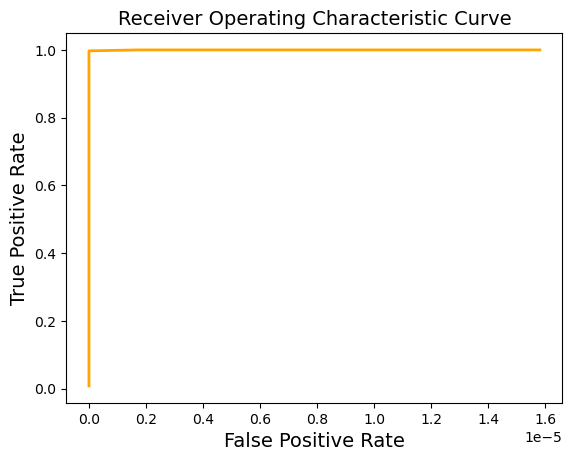

In [11]:
#extracting the values from the perf_new.txt file and appending the values to fpr and tpr lists
file=open("lists_roc.txt", "r")
lst=[]
fpr_list1=[]
fpr_list=[]
tpr_list=[]
tpr_list1=[]
for line in file:
    lst.append(line.strip().split("["))
for i in range(len(lst)):
    fpr_list1=lst[0][1].split(",") 
    tpr_list1=lst[1][1].split(",")
fpr_list1.pop(-1)
tpr_list1.pop(-1)
for el in fpr_list1:
    fpr_list.append(float(el))
for element in tpr_list1:
    tpr_list.append(float(element))
print(fpr_list)
print(tpr_list)

import matplotlib.pyplot as plt
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("Receiver Operating Characteristic Curve", fontsize=14)
plt.plot(fpr_list, tpr_list, color='orange', linewidth=2)

In [12]:
%%bash
python statistics.py <(cat tset1.txt tset2.txt)> results_stats.txt
less results_stats.txt

Q09JW4 FP
P83605 FP
P0DJ63 FP
P85039 FP
C5H8E7 FP
P84555 FP
Q09JW3 FP
P84556 FP
Q8WPG5 FP
Threshold: 1 
ACC: 0.9999841964972415 
Matthews: 0.9879837472091391 
TPR: 1.0 
FPR: 1.5813721390342386e-05 
TNR: 0.9999841862786096 
PositivePredVal: 0.9761273209549072 
NegPredVal: 1.0 
The Matrix: [[368.0, 9.0], [0.0, 569117.0]]
P83605 FP
P0DJ63 FP
C5H8E7 FP
P84555 FP
Q09JW3 FP
Threshold: 0.1 
ACC: 0.9999912202762452 
Matthews: 0.9932706109760464 
TPR: 1.0 
FPR: 8.785400772412435e-06 
TNR: 0.9999912145992276 
PositivePredVal: 0.9865951742627346 
NegPredVal: 1.0 
The Matrix: [[368.0, 5.0], [0.0, 569121.0]]
P84555 FP
Threshold: 0.01 
ACC: 0.9999982440552491 
Matthews: 0.9986431898237274 
TPR: 1.0 
FPR: 1.7570801544824872e-06 
TNR: 0.9999982429198455 
PositivePredVal: 0.997289972899729 
NegPredVal: 1.0 
The Matrix: [[368.0, 1.0], [0.0, 569125.0]]
D3GGZ8 FN
Threshold: 0.001 
ACC: 0.9999982440552491 
Matthews: 0.9986395027202013 
TPR: 0.9972826086956522 
FPR: 0 
TNR: 1.0 
PositivePredVal: 1.0 
NegPre